In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from detectron2 import model_zoo

In [3]:
from detectron2.config import get_cfg

In [4]:
from detectron2.utils.visualizer import Visualizer,ColorMode

In [5]:
from detectron2.data import MetadataCatalog,DatasetCatalog

In [6]:
from detectron2.data.datasets import register_coco_instances

In [7]:
register_coco_instances('food',{},'json\_annotations.coco.json','data')

In [8]:
meta_data=MetadataCatalog.get('food')

In [9]:
meta_data

namespace(name='food',
          json_file='json\\_annotations.coco.json',
          image_root='data',
          evaluator_type='coco')

In [10]:
DatasetCatalog.get('food')[0]

{'file_name': 'data\\burger_25_jpg.rf.0781a8fcd622f07d82a0f9865171112d.jpg',
 'height': 640,
 'width': 640,
 'image_id': 0,
 'annotations': [{'iscrowd': 0,
   'bbox': [210, 193, 414.222, 410.667],
   'category_id': 0,
   'segmentation': [[624,
     193.333,
     209.778,
     193.333,
     209.778,
     604,
     624,
     604,
     624,
     193.333]],
   'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

In [11]:
from detectron2.engine import DefaultTrainer

In [12]:
cfg=get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml'))
cfg.MODEL.WEIGHTS=model_zoo.get_checkpoint_url('COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml')
cfg.DATASETS.TRAIN=('food',)
cfg.DATASETS.TEST=()
cfg.SOLVER.BASE_LR=0.001
cfg.MODEL.ROI_BOX_HEAD.CONV_DIM =640
cfg.MODEL.ROI_BOX_HEAD.NORM = "GN"
cfg.MODEL.ROI_BOX_HEAD.FC_DIM = 1024
cfg.SOLVER.WARMUP_FACTOR = 1.0 / 1000
cfg.SOLVER.WARMUP_ITERS = 100
cfg.SOLVER.WARMUP_METHOD = "linear"
cfg.SOLVER.GAMMA = 0.1
cfg.SOLVER.STEPS = (100,)
cfg.SOLVER.WEIGHT_DECAY = 0.0001
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE =128 # Faster, and good enough for this toy dataset
cfg.SOLVER.MAX_ITER=380
cfg.SOLVER.IMS_PER_BATCH=2
cfg.DATALOADER.NUM_WORKERS=5
cfg.MODEL.ROI_HEADS.NUM_CLASSES=2
cfg.OUTPUT_DIR='./output_models'
cfg.MODEL.DEVICE='cpu'

In [13]:
import os

In [14]:
os.makedirs(cfg.OUTPUT_DIR,exist_ok=True)
trainer=DefaultTrainer(cfg)
trainer.resume_or_load(False)
trainer.train()

[09/02 07:42:45 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (2, 256, 1, 1) in

[09/02 07:42:46 d2.engine.train_loop]: Starting training from iteration 0
[09/02 07:48:06 d2.utils.events]:  eta: 1:34:53  iter: 19  total_loss: 2.279  loss_cls: 1.094  loss_box_reg: 0.4922  loss_mask: 0.6894  loss_rpn_cls: 0.006833  loss_rpn_loc: 0.006936    time: 15.7007  last_time: 16.0562  data_time: 0.2143  last_data_time: 0.0078   lr: 1.981e-05  
[09/02 07:53:23 d2.utils.events]:  eta: 1:30:10  iter: 39  total_loss: 1.861  loss_cls: 0.7961  loss_box_reg: 0.3961  loss_mask: 0.6258  loss_rpn_cls: 0.005863  loss_rpn_loc: 0.008295    time: 15.7768  last_time: 15.0798  data_time: 0.0014  last_data_time: 0.0010   lr: 3.961e-05  
[09/02 07:58:27 d2.utils.events]:  eta: 1:23:31  iter: 59  total_loss: 1.361  loss_cls: 0.4387  loss_box_reg: 0.3888  loss_mask: 0.5189  loss_rpn_cls: 0.01052  loss_rpn_loc: 0.007664    time: 15.5771  last_time: 15.6833  data_time: 0.0013  last_data_time: 0.0012   lr: 5.941e-05  
[09/02 08:03:28 d2.utils.events]:  eta: 1:17:53  iter: 79  total_loss: 1.272  loss

In [15]:
from detectron2.engine import DefaultPredictor

In [16]:
cfg.MODEL.WEIGHTS=os.path.join(cfg.OUTPUT_DIR,'model_final.pth')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9
predictor = DefaultPredictor(cfg)

[09/02 09:40:19 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output_models\model_final.pth ...


In [42]:
import cv2 as cv
img=cv.imread('pizza2.jpg')

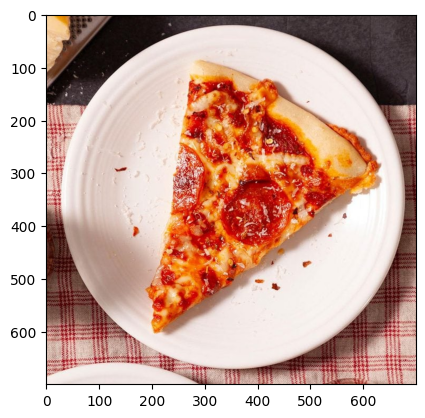

In [43]:
import matplotlib.pyplot as pl
pl.imshow(img[:,:,::-1])

In [44]:
output=predictor(img)

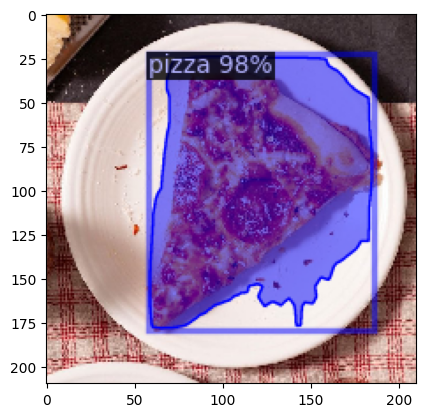

In [45]:
v=Visualizer(img,MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),scale=.3,instance_mode=ColorMode.IMAGE)
out=v.draw_instance_predictions(output['instances'].to('cpu'))
pl.imshow(out.get_image()[:,:,::-1])
pl.show()

In [22]:
import pickle

In [33]:
config_path = os.path.join(cfg.OUTPUT_DIR, "config.yaml")
with open(config_path, "w") as f:                            #save config file
    f.write(cfg.dump())

In [32]:
metadata_path= os.path.join(cfg.OUTPUT_DIR, "meta_data.pkl")
def save_model (path,obj):
    with open (path,'wb') as path:                            #save meta data
        pickle.dump(obj,path)
save_model(metadata_path,meta_data)

In [46]:
classes = output["instances"].pred_classes #Get the predicted all class IDs

In [47]:
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])  #Get the dataset metadata
class_names = metadata.get("thing_classes", None) #get id 

In [48]:
predicted_class_names = [class_names[i] for i in classes]

In [49]:
predicted_class_names[0] #get class name 

'pizza'

In [51]:
from flask import Flask,render_template,request

In [52]:
import io
import base64

In [53]:
import numpy as np

In [55]:
from detectron2.engine import DefaultPredictor

In [59]:
from PIL import Image

In [68]:
app=Flask(__name__,template_folder='demo/')
UPLOAD_FOLDER = 'uploads/'
app.config['UPLOAD_FOLDER']=UPLOAD_FOLDER
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
@app.route ('/')
def home():
    return render_template('test.html')
@app.route('/marks', methods=['POST'])
def marks():
    file=request.files['image']
    file.save(os.path.join('uploads',file.filename))  #save pic in dir
    image = Image.open(file.stream) #load image
    image=image.resize((400,400)) #resize
    np_array=np.array(image) #convert into numpy array
    pil_image = Image.fromarray(np_array) #again convert into PIL image
    buffered = io.BytesIO() #create object
    pil_image.save(buffered, format="JPEG") #save in bytes    
    plot_url1= base64.b64encode(buffered.getvalue()).decode() #encoding 
    return render_template('res.html',x=plot_url1)

In [69]:
if __name__=='__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Sep/2024 20:10:27] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Sep/2024 20:10:27] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [02/Sep/2024 20:10:32] "POST /marks HTTP/1.1" 200 -


In [ ]:
def  ImageEncoding(file_path: str):
    with open(file_path,'rb') as file:
        encode=base64.b64encode(file.read()).decode('utf-8')
        return encode
def  ImageDecoding(encoding_data: str,filename: str):
    decode=base64.b64decode(encoding_data)
    with open('./'+filename,'wb') as file1:
        file1.write(decode)
        print(f"Image saved to {filename}")
data=ImageEncoding('animal.jpg')
ImageDecoding(data,'copy.jpg')